# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

# 🕵️‍♀️ Explorační analýza

# ✨ Příprava dat

## 📦 Import potřebných balíčků.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import holoviews as hv
import plotly
import pywaffle as waff
import httpimport

with httpimport.github_repo('vinsburg', 'alluvial_diagram', ref='master'):
  import alluvial

In [2]:
plt.style.use('ggplot')
red = (226/255, 74/255, 51/255)
blue = (52/255, 138/255, 189/255)

## 📂 Načtení dat z `csv` souborů

In [3]:
intakes_df = pd.read_csv('intakes.csv')
outcomes_df = pd.read_csv('outcomes.csv')

## 📊 Seznámení s datasety

In [4]:
print('intakes.csv')
display(intakes_df.head(3))
print('outcomes.csv')
display(outcomes_df.head(3))

intakes.csv


Animal ID     Name                DateTime     MonthYear  \
0   A786884   *Brock  01/03/2019 04:19:00 PM  January 2019   
1   A706918    Belle  07/05/2015 12:59:00 PM     July 2015   
2   A724273  Runster  04/14/2016 06:43:00 PM    April 2016   

                        Found Location Intake Type Intake Condition  \
0  2501 Magin Meadow Dr in Austin (TX)       Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)       Stray           Normal   
2   2818 Palomino Trail in Austin (TX)       Stray           Normal   

  Animal Type Sex upon Intake Age upon Intake                     Breed  \
0         Dog   Neutered Male         2 years                Beagle Mix   
1         Dog   Spayed Female         8 years  English Springer Spaniel   
2         Dog     Intact Male       11 months               Basenji Mix   

         Color  
0     Tricolor  
1  White/Liver  
2  Sable/White

outcomes.csv


Animal ID   Name                DateTime MonthYear Date of Birth  \
0   A794011  Chunk  05/08/2019 06:20:00 PM  May 2019    05/02/2017   
1   A776359  Gizmo  07/18/2018 04:02:00 PM  Jul 2018    07/12/2017   
2   A821648    NaN  08/16/2020 11:38:00 AM  Aug 2020    08/16/2019   

  Outcome Type Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
0    Rto-Adopt             NaN         Cat    Neutered Male          2 years   
1     Adoption             NaN         Dog    Neutered Male           1 year   
2   Euthanasia             NaN       Other          Unknown           1 year   

                     Breed              Color  
0   Domestic Shorthair Mix  Brown Tabby/White  
1  Chihuahua Shorthair Mix        White/Brown  
2                  Raccoon               Gray

In [5]:
print('intakes.csv:')
intakes_df.info()
print('\noutcomes.csv:')
outcomes_df.info()

intakes.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB

outcomes.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---

### Velikost dat

V datasetu intakes je před úpravami 138585 a v outcomes 138769 záznamů.

### 🔎 Seznam příznaků

Oba datasety mají 12 příznaků. Pandas všechny zpracovává jako Object (typ string).

Datasety společně sdílí následující příznaky (v hranatých závorkách jsou datové typy charakteristické pro dané hodnoty):

* Animal ID_- id zvířete
* Name [str] - jméno zvířete
* DateTime [datetm.] - čas vzniku záznamu
* MonthYear [date] - měsíc a rok příchodu (in), odchodu (out)
* Animal Type [cat. nom.] - druh zvířete
* Intake-Outcome Type [cat. nom.] - způsob příchodu (in), odchodu (out)
* Sex upon Intake-Outcome [cat. nom.] - pohlaví zvířete (včetně inf. o kastraci)
* Age upon Intake-Outcome [int.] - věk zvířete v moment příchodu (in), odchodu (out)
* Breed [cat. nom.] - plemeno zvířete
* Color [cat. nom.] - barva zvířete

V datasetu intakes jsou navíc:
* Found Location [cat. nom.] - místo nalezení zvířete
* Intake Condition [cat. nom.] - stav zvířete při příchodu

V datasetu outcomes jsou navíc:
* Date of Birth [date] - datum narození zvířete
* Outcome Subtype [cat. nom.] - podtyp způsobu odchodu

### ❓ Chybějící hodnoty

Z výpisu o datasetech je vidět, že
* v intakes chybí data ve sloupcích [Name, Sex upon Intake]
* v outcomes chybí ve sloupích [Name, Outcome Type, Outcome Subtype, Sex upon Outcome, Sex upon Outcome]

Tohle však ještě nejsou všechna chybějící data (zbytek vyřešíme postupně u zpracování jednotlivých příznaků).

In [6]:
def subplot_missing_values(ax, data, title):
    ax.barh(data.index, data)
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)

def subplot_missing_values_matrix(ax, data):
    msno.matrix(data, fontsize=10, sparkline=False, ax=ax, color=red)
    ax.set_xlabel('Data-density display')
    ax.get_yaxis().set_visible(False)

def plot_missing(df1, name1, df2, name2, *, title='Missing value counts (incomplete)'):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), layout='constrained')
    fig.suptitle(title, fontsize=16)
    subplot_missing_values(axes[0][0], df1.isna().sum(axis=0), name1)
    subplot_missing_values(axes[0][1], df2.isna().sum(axis=0), name2)
    subplot_missing_values_matrix(axes[1][0], df1)
    subplot_missing_values_matrix(axes[1][1], df2)

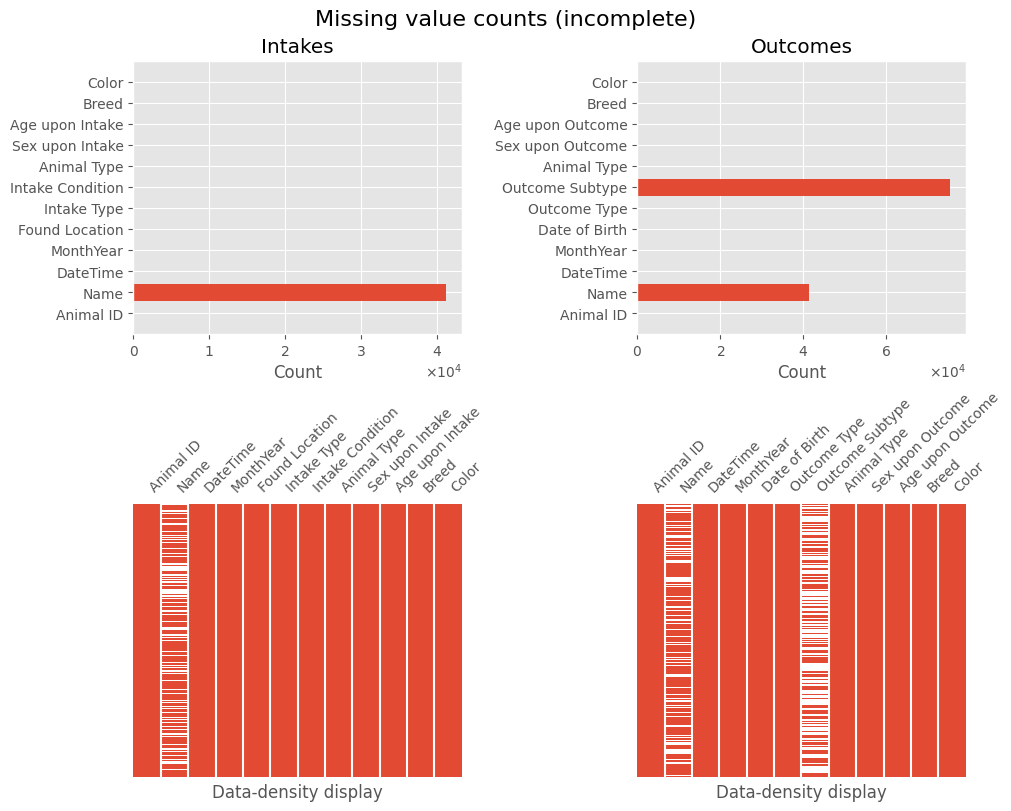

In [7]:
plot_missing(intakes_df, 'Intakes', outcomes_df, 'Outcomes')

### Unikátní hodnoty příznaků

In [8]:
print('intakes.csv:')
display(intakes_df.nunique())
print(intakes_df.apply(lambda col: col.unique()))

print('\noutcomes.csv:')
display(outcomes_df.nunique())
print(outcomes_df.apply(lambda col: col.unique()))

intakes.csv:


Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

Animal ID           [A786884, A706918, A724273, A665644, A682524, ...
Name                [*Brock, Belle, Runster, nan, Rio, Odin, Beowu...
DateTime            [01/03/2019 04:19:00 PM, 07/05/2015 12:59:00 P...
MonthYear           [January 2019, July 2015, April 2016, October ...
Found Location      [2501 Magin Meadow Dr in Austin (TX), 9409 Blu...
Intake Type         [Stray, Owner Surrender, Public Assist, Wildli...
Intake Condition    [Normal, Sick, Injured, Pregnant, Nursing, Age...
Animal Type                        [Dog, Cat, Other, Bird, Livestock]
Sex upon Intake     [Neutered Male, Spayed Female, Intact Male, In...
Age upon Intake     [2 years, 8 years, 11 months, 4 weeks, 4 years...
Breed               [Beagle Mix, English Springer Spaniel, Basenji...
Color               [Tricolor, White/Liver, Sable/White, Calico, T...
dtype: object

outcomes.csv:


Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

Animal ID           [A794011, A776359, A821648, A720371, A674754, ...
Name                [Chunk, Gizmo, nan, Moose, Princess, Quentin, ...
DateTime            [05/08/2019 06:20:00 PM, 07/18/2018 04:02:00 P...
MonthYear           [May 2019, Jul 2018, Aug 2020, Feb 2016, Mar 2...
Date of Birth       [05/02/2017, 07/12/2017, 08/16/2019, 10/08/201...
Outcome Type        [Rto-Adopt, Adoption, Euthanasia, Transfer, Re...
Outcome Subtype     [nan, Partner, Foster, SCRP, Out State, Suffer...
Animal Type                        [Cat, Dog, Other, Bird, Livestock]
Sex upon Outcome    [Neutered Male, Unknown, Intact Male, Spayed F...
Age upon Outcome    [2 years, 1 year, 4 months, 6 days, 7 years, 2...
Breed               [Domestic Shorthair Mix, Chihuahua Shorthair M...
Color               [Brown Tabby/White, White/Brown, Gray, Buff, O...
dtype: object


Můžeme si všimnout, že počet unikátních Animal ID neodpovídá počtu řádků v příslušných datasetech (některá zvířata se do útulku vrací). Dále z výčtu několika unikátních hodnot ze sloupců Age upon in/out zjišťujeme, že vstupy nějsou konzistentní (míchají se záznamy v letech, měsících and dnech).

## 🧹 Průzkum a čištění dat

In [9]:
print(pd.concat([intakes_df.columns.to_series(), outcomes_df.columns.to_series()]).drop_duplicates().tolist())

['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Age upon Intake', 'Breed', 'Color', 'Date of Birth', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome']


Postup
* Ručně projedeme následující příznaky, identifikujeme způsoby, kterými uvádějí chybějící hodnoty.
* Ty následně nahradíme hodnotou NaN.
* Současně transformujeme data tak, aby byly konzistentní společně s ostatními hodnotami (převod na společnou jednotku, stejný formát).
* Dále v průběhu zpracování každého příznaku převedeme sloupce na příslušný typ: category, int, datetime, atd.
* Redundantní příznaky odstraníme, rozsáhlé příznaky roztrhneme.

Napřed se zbavíme všech duplicitních záznamů.

In [10]:
intakes_df = intakes_df.drop_duplicates()
outcomes_df = outcomes_df.drop_duplicates()

In [11]:
print(intakes_df.shape[0], outcomes_df.shape[0])

138565 138752


Po odstranění vidíme, že skutečný počet záznamů v datasetech je 138565 (in) a 138752 (out).

### Animal ID

In [12]:
print(sum(intakes_df['Animal ID'].str.startswith('A') == False),
      sum(outcomes_df['Animal ID'].str.startswith('A') == False))

0 0


Všechny hodnoty ve sloupci Animal ID začínají na "A". ID jsou kozistentní a bez chybějících hodnot.

### Name

In [13]:
print(intakes_df['Name'].iloc[:10].tolist())

['*Brock', 'Belle', 'Runster', nan, 'Rio', 'Odin', 'Beowulf', '*Ella', 'Mumble', nan]


Některá jména začínají hvězdičkou. Abychom zachovali konzistenci dat tento znak odstraníme.

Dále některé záznamy mají v položce jména duplicitně Animal ID. Tyto hodnoty nahradíme hodnotou NaN.

In [14]:
intakes_df['Name'] = intakes_df.loc[:, 'Name'].str.removeprefix('*')
outcomes_df['Name'] = intakes_df.loc[:, 'Name'].str.removeprefix('*')

mask = intakes_df['Name'] == intakes_df['Animal ID']
intakes_df.loc[mask, 'Name'] = np.nan

### DateTime, Date of Birth

Příznaky [DateTime, MonthYear] jsou časové hodnoty, proto je převedeme na správný datový typ času (datetime64).

In [15]:
intakes_df['DateTime'] = pd.to_datetime(intakes_df.loc[:, 'DateTime'], format='%m/%d/%Y %H:%M:%S %p')
outcomes_df['DateTime'] = pd.to_datetime(outcomes_df.loc[:, 'DateTime'], format='%m/%d/%Y %H:%M:%S %p')
outcomes_df['Date of Birth'] = pd.to_datetime(outcomes_df.loc[:, 'Date of Birth'], format='%m/%d/%Y')

### MonthYear

In [16]:
# porovnání hodnot v MonthYear a DateTime
print(sum(intakes_df['MonthYear'].str.split(expand=True)[0] != intakes_df['DateTime'].dt.month_name()),
      sum(intakes_df['MonthYear'].str.split(expand=True)[1].astype('int32') != intakes_df['DateTime'].dt.year))

0 0


Příznak MonthYear obsahuje redundantní informaci, která je již obsažena v příznaku _DateTime_. Sloupec můžeme odstranit.

In [17]:
intakes_df = intakes_df.drop(columns=['MonthYear'], errors='ignore')
outcomes_df = outcomes_df.drop(columns=['MonthYear'], errors='ignore')

### Intake-Outcome Type, Intake Condition, Animal Type, Breed, Color, Outcome Subtype, Found Location

In [18]:
print('Animal Type:\t\t', *intakes_df['Animal Type'].unique())
print('Intake Type:\t\t', *intakes_df['Intake Type'].unique())
print('Outcome Type:\t\t', *outcomes_df['Outcome Type'].unique())
print('Intake Condition:\t', *intakes_df['Intake Condition'].unique())
print('Outcome Subtype:\t', *outcomes_df['Outcome Subtype'].unique()[:10], '...')
print('Breed:\t\t\t', *intakes_df['Breed'].unique()[:5], '...')
print('Color:\t\t\t', *intakes_df['Color'].unique()[:10], '...')
print('Found Location:\t\t', *intakes_df['Found Location'].unique()[:4], '...')

Animal Type:		 Dog Cat Other Bird Livestock
Intake Type:		 Stray Owner Surrender Public Assist Wildlife Euthanasia Request Abandoned
Outcome Type:		 Rto-Adopt Adoption Euthanasia Transfer Return to Owner Died Disposal Missing Relocate nan
Intake Condition:	 Normal Sick Injured Pregnant Nursing Aged Medical Other Neonatal Feral Behavior Med Urgent Space Med Attn Panleuk
Outcome Subtype:	 nan Partner Foster SCRP Out State Suffering Underage Snr Rabies Risk In Kennel ...
Breed:			 Beagle Mix English Springer Spaniel Basenji Mix Domestic Shorthair Mix Doberman Pinsch/Australian Cattle Dog ...
Color:			 Tricolor White/Liver Sable/White Calico Tan/Gray Chocolate Black Brown Tabby Black/White Cream Tabby ...
Found Location:		 2501 Magin Meadow Dr in Austin (TX) 9409 Bluegrass Dr in Austin (TX) 2818 Palomino Trail in Austin (TX) Austin (TX) ...


Hodnoty v těchto příznacích jsou v pořádku. Příznaky jen zkonvertujeme na kategorické.
Z výčtu jsou také vidět jiné způsoby značení chybějících hodnot ("", nan, Unknown). Chybějící hodnoty rovnou nahradíme hodnotou NaN.

In [19]:
for nanstr in ['', 'nan', 'Unknown']:
    intakes_df = intakes_df.replace(nanstr, np.nan)
    outcomes_df = outcomes_df.replace(nanstr, np.nan)

In [20]:
in_cols = ['Intake Type', 'Intake Condition', 'Animal Type', 'Breed', 'Color', 'Found Location']
out_cols = ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Breed', 'Color']
intakes_df[in_cols] = intakes_df[in_cols].astype('category')
outcomes_df[out_cols] = outcomes_df[out_cols].astype('category')

In [21]:
def subplot_cat_values(ax, series, *, rot=False, ylabel=True):
    counts = series.value_counts()
    ax.bar(counts.index, counts)
    ax.set_xticks(counts.index)
    ax.tick_params(labelsize=9)
    if rot:
        ax.tick_params(rotation=45)
    ax.set_xlabel(series.name, fontsize=12)
    if ylabel:
        ax.set_ylabel('Count', fontsize=12)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

def plot_cat_values(df, title, c1, c2, c3, rot=False):
    fig = plt.figure( figsize=(10, 8), layout='constrained')
    gs = fig.add_gridspec(2, 3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1:3])
    ax3 = fig.add_subplot(gs[1, :])

    fig.suptitle(title, fontsize=18)
    subplot_cat_values(ax1, df[c1])
    subplot_cat_values(ax2, df[c2], rot=rot)
    subplot_cat_values(ax3, df[c3], rot=rot)

U příznaků s menším počtem kategorií si můžeme zobrazit četnost jednotlivých hodnot pro získání lepší představy o datech. V této fázi ještě z dat nic nevyvozuju.

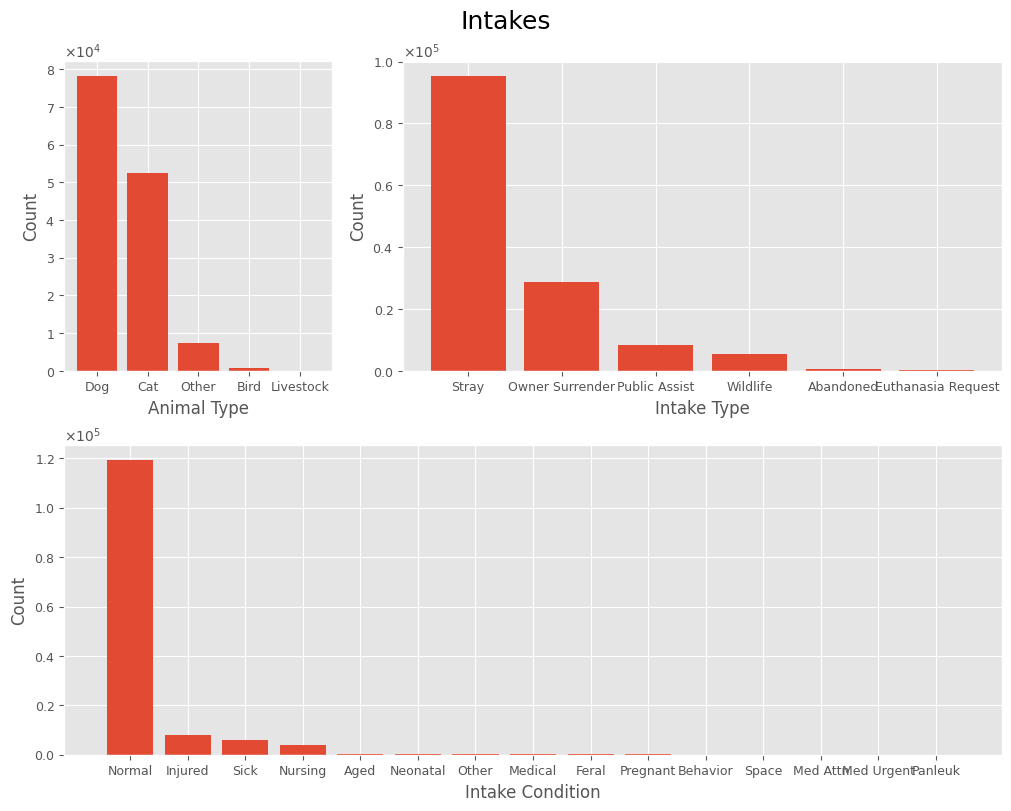

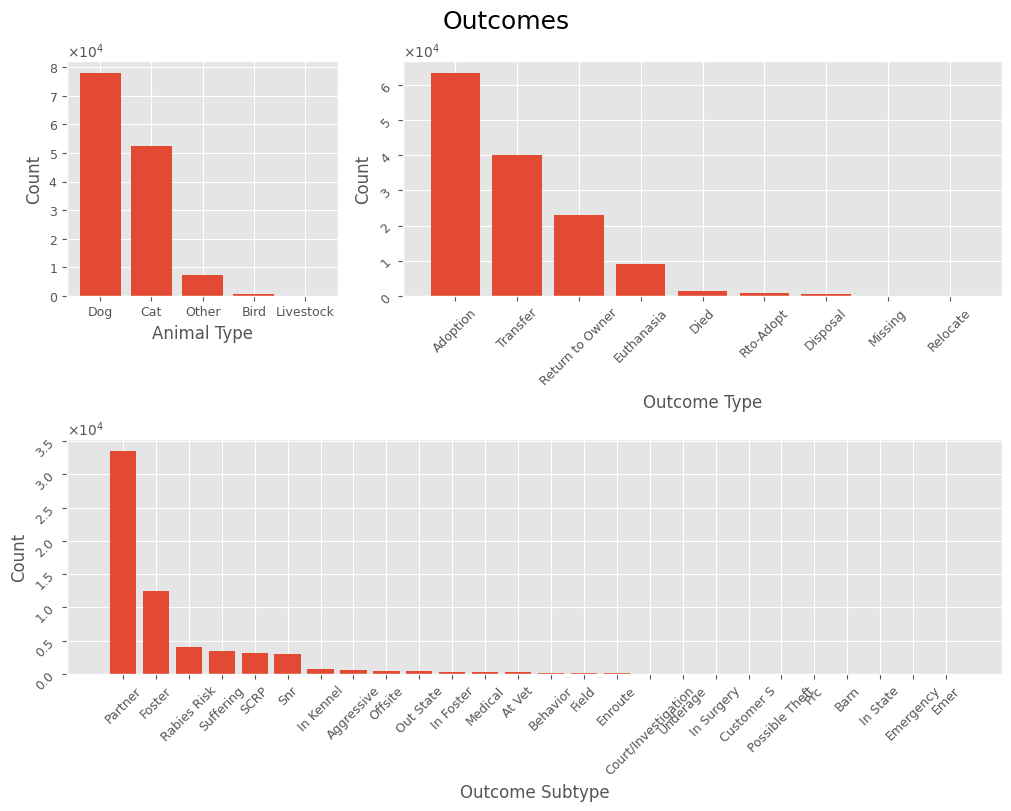

In [22]:
plot_cat_values(intakes_df, 'Intakes', *['Animal Type', 'Intake Type', 'Intake Condition'], rot=False)
plot_cat_values(outcomes_df, 'Outcomes', *['Animal Type', 'Outcome Type', 'Outcome Subtype'], rot=True)

### Sex upon Intake-Outcome

Příznak Sex upon Intake a Sex upon Outcome jdou roztrhnout na dva příznaky Sex (cat.) a Sterile (bool). Po rozdělení se s těmito příznaky bude lépe pracovat.

Provede následující transformace na zkonstruování nového příznaku Sterile:
* Neutered Male, Spayed Female -> Sterile: True
* Intact Male, Intact Female -> Sterile: False

Pohlaví pouze od zbytku oddělíme a přidělíme nový sloupec Sex. Původní příznak nebude obsahovat nic navíc (můžeme ho zahodit).

Následně nastavíme příznaky kategorického typu.

Nepoměr dat bude v poslední části analýzy podrobněji odiskutovaný.

In [23]:
print('Sex upon Intake:\t', intakes_df['Sex upon Intake'].unique())
print('Sex upon Outcome:\t', outcomes_df['Sex upon Outcome'].unique())

Sex upon Intake:	 ['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' nan]
Sex upon Outcome:	 ['Neutered Male' nan 'Intact Male' 'Spayed Female' 'Intact Female']


In [24]:
# split
intakes_df[['Sterile', 'Sex']] = intakes_df['Sex upon Intake'].str.split(expand=True)
outcomes_df[['Sterile', 'Sex']] = outcomes_df['Sex upon Outcome'].str.split(expand=True)

In [25]:
sterilMap = {'Neutered': True, 'Spayed': True, 'Intact': False}
intakes_df['Sterile'] = intakes_df['Sterile'].map(sterilMap)
outcomes_df['Sterile'] = outcomes_df['Sterile'].map(sterilMap)

# drop
intakes_df = intakes_df.drop(columns=['Sex upon Intake'])
outcomes_df = outcomes_df.drop(columns=['Sex upon Outcome'])

In [26]:
cols = ['Sterile', 'Sex']
intakes_df[cols] = intakes_df[cols].astype('category')
outcomes_df[cols] = outcomes_df[cols].astype('category')

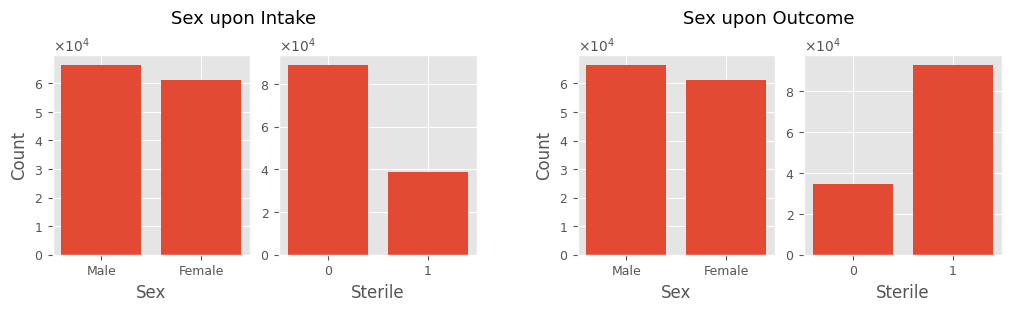

In [27]:
fig = plt.figure(figsize=(10, 3), layout='constrained')
(fig1, fig2) = fig.subfigures(1, 2, wspace=0.1)

axes = fig1.subplots(1, 2)
fig1.suptitle('Sex upon Intake', fontsize=13)
subplot_cat_values(axes[0], intakes_df['Sex'])
subplot_cat_values(axes[1], intakes_df['Sterile'], ylabel=False)

axes = fig2.subplots(1, 2)
fig2.suptitle('Sex upon Outcome', fontsize=13)
subplot_cat_values(axes[0], outcomes_df['Sex'])
subplot_cat_values(axes[1], outcomes_df['Sterile'], ylabel=False)

### Age upon Intake-Outcome

In [28]:
intakes_df['Age upon Intake'].unique()

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '14 years', '1 month', '2 months',
       '18 years', '9 years', '4 months', '1 year', '3 years', '4 days',
       '1 day', '5 years', '2 weeks', '15 years', '7 years', '3 weeks',
       '3 months', '12 years', '1 week', '9 months', '10 years',
       '10 months', '7 months', '8 months', '1 weeks', '5 days',
       '0 years', '2 days', '11 years', '17 years', '3 days', '13 years',
       '5 weeks', '19 years', '6 days', '16 years', '20 years',
       '-1 years', '22 years', '23 years', '-2 years', '21 years',
       '-3 years', '25 years', '24 years', '30 years', '28 years'],
      dtype=object)

Z výpisu unikátních hodnot je vidět, že se v datech vyskytují překlepy v podobě záporných hodnot. Tyto záznamy opravíme a se zbylými daty převedeme na dny.

* Číselnou hodnotu od slova oddělíme,
* převedeme na nezáporné číslo
* a následně transformujeme dle jednotky na celé dny tak, aby byly všechny hodnoty ve stejným měřítku.

Součástí zpracování příznaky rovnou nastavíme na numerický typ.

Pozn.: Zvířata označené jako `0 years` interpretujeme jako novorozence.

In [29]:
tmp_in = intakes_df['Age upon Intake'].str.split(expand=True)
tmp_out = outcomes_df['Age upon Outcome'].str.split(expand=True)

tmp_in[0] = tmp_in[0].astype('Int64').abs()  # nullable integer
tmp_out[0] = tmp_out[0].astype('Int64').abs()

print(*tmp_in[1].unique())
print(*tmp_out[1].unique())

years months weeks month year days day week
years year months days weeks month day week nan


In [30]:
def convert_ages(tmp_df):
    yearMask = tmp_df[1].isin(['years', 'year'])
    monthMask = tmp_df[1].isin(['months', 'month'])
    weekMask = tmp_df[1].isin(['weeks', 'week'])
    tmp_df.loc[yearMask, 0] = tmp_df.loc[yearMask, 0] * 365
    tmp_df.loc[monthMask, 0] = tmp_df.loc[monthMask, 0] * 30
    tmp_df.loc[weekMask, 0] = tmp_df.loc[weekMask, 0] * 7
    return tmp_df[0]

intakes_df['Age upon Intake'] = convert_ages(tmp_in)
outcomes_df['Age upon Outcome'] = convert_ages(tmp_out)

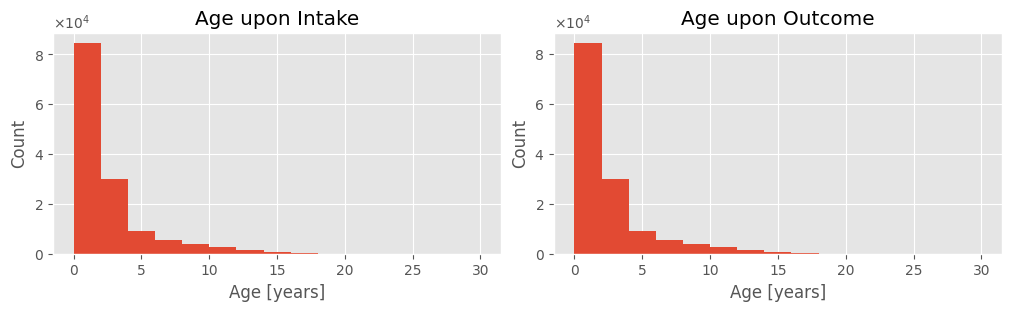

In [31]:
def subplot_age(ax, data, title):
    ax.set_title(title)
    ax.hist(data, bins=15)
    ax.set_ylabel('Count')
    ax.set_xlabel('Age [years]')
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 3), layout='constrained')
subplot_age(axes[0], intakes_df['Age upon Intake'].dropna()/365, 'Age upon Intake')
subplot_age(axes[1], outcomes_df['Age upon Outcome'].dropna()/365, 'Age upon Outcome')

## 💡 Shrnutí

Příznaky obou datasetů jsme převedli na příslušné datové typy.

* Příznaky [Animal ID, Name] jsme nechali ve formátu string (object),
* [DateTime, Date of Birth] převedli na datetime (datetime64),
* Age transformovali na numerickou hodnotu (int64) a
* ostatní převedli do kategorického typu (category).
* Redundantní příznak MonthYear jsme odstranili a
* rozsáhlejší příznak Sex upon Intake-Outcome roztrhli na dva smysluplné příznaky.
* Porušená data jsme opravili (záporný věk, překlepy) a chybějí doplnili.

Nyní máme mnohem lepší představu o chybějících datech. Předpřipravená data máme v proměnnách
* intakes_df
* outcomes_df

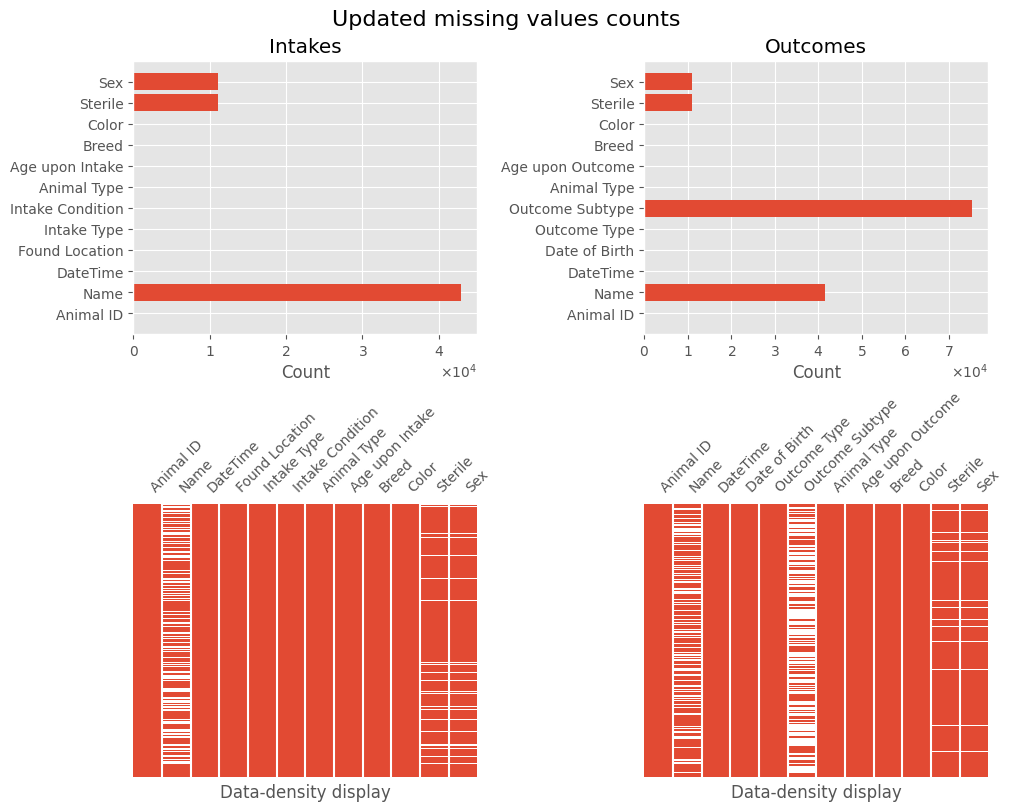

In [32]:
plot_missing(intakes_df, 'Intakes', outcomes_df, 'Outcomes', title='Updated missing values counts')

# 🖊️ Deskriptivní statistiky

In [33]:
def print_univar_num_stats(series):
    print(series.name, 'statistics')
    print()
    print('min:\t', series.min())
    print('max:\t', series.max())
    print('mean:\t', series.mean())
    print('median:\t', series.median())
    print('range:\t', series.max() - series.min())
    print()
    print('lower quartile:\t', series.quantile(0.25))
    print('upper quartile:\t', series.quantile(0.75))
    print('IQR:\t\t', series.quantile(0.75) - series.quantile(0.25))
    print()
    print('variance:\t', series.var())
    print('std. variation:\t', series.std())
    print('skewness:\t', series.skew())
    print('kurtosis:\t', series.kurtosis())

def print_univar_dt_stats(series):
    print(series.name, 'statistics')
    print()
    print('min:\t', series.min())
    print('max:\t', series.max())
    print('mode:\t', list(series.mode()))
    print('range:\t', series.max() - series.min())

def plot_univar_num(title1, title2, xlabel, ylabel, data, *, bins=15, xlim=None, scinot=False, showfliers=True):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', gridspec_kw={'wspace': 0.1})
    ax = axes[0]
    ax.set_title(title1)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if scinot:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
    ax.hist(data, bins=bins)

    medianprops = dict(linewidth=2.5, color=(1, 0.38, 0.27))
    flierprops = dict(marker='d', markerfacecolor=(1, 0.38, 0.27), markersize=8, markeredgecolor='none')
    ax = axes[1]
    ax.set_title(title2)
    ax.set_xlabel(xlabel)
    if xlim != None:
        ax.set_xlim(xlim)
    ax.boxplot(data, vert=False, widths=[0.4], showfliers=showfliers, flierprops=flierprops, medianprops=medianprops)
    ax.get_yaxis().set_visible(False)

## 🎂 Příznak Age upon Intake

Popište příznaky **Age upon Intake** a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.

In [34]:
age = intakes_df['Age upon Intake'].dropna()
ageY = intakes_df['Age upon Intake'] / 365
age.info()

<class 'pandas.core.series.Series'>
Index: 138565 entries, 0 to 138584
Series name: Age upon Intake
Non-Null Count   Dtype
--------------   -----
138565 non-null  Int64
dtypes: Int64(1)
memory usage: 2.2 MB


In [35]:
print_univar_num_stats(ageY)

Age upon Intake statistics

min:	 0.0
max:	 30.0
mean:	 2.0278033206313832
median:	 1.0
range:	 30.0

lower quartile:	 0.1643835616438356
upper quartile:	 2.0
IQR:		 1.8356164383561644

variance:	 8.170721564564788
std. variation:	 2.8584474045475785
skewness:	 2.3340016328003066
kurtosis:	 5.968203952133479


Příznak Age upon Intake (věk zvířete v moment přijetí) je numerický příznak. Hodnoty v datasetu jsou z předzpracovaní vyjádřené v dnech. Záznamy s chybějící hodnotou Age upon Intake v tomto příznaku ignorujeme.

* Ze základních popisných statistik vidíme, že věk zvířat se v době příchodu pohybuje mezi 0 (novorozenci) a 30 let.
* Průměr je lehce nad 2 let a medián je 1 rok.
* I přestože celkový rozsah hodnot je 30 let, mezikvartilové rozpětí je pouhých 1.8 let.
* Kladný koeficient šikmosti indikuje pravostrannou šikmost.
* Vysoký koeficient šikmosti značí, že většina hodnot leží velmi blízko hodnoty 2 (střední hodnota).

V následujícím histogramu jdou názorně vidět zmíněné poznatky. Z oříznutého boxplotu je zřejmé, že i přestože je průměr 2, většina (75%) zvířat je ještě mladší. Průměr je v tomto případě zkreslený kvůli odlehlým hodnotám. O věku zvířat v útulku vypovídá lépe medián.

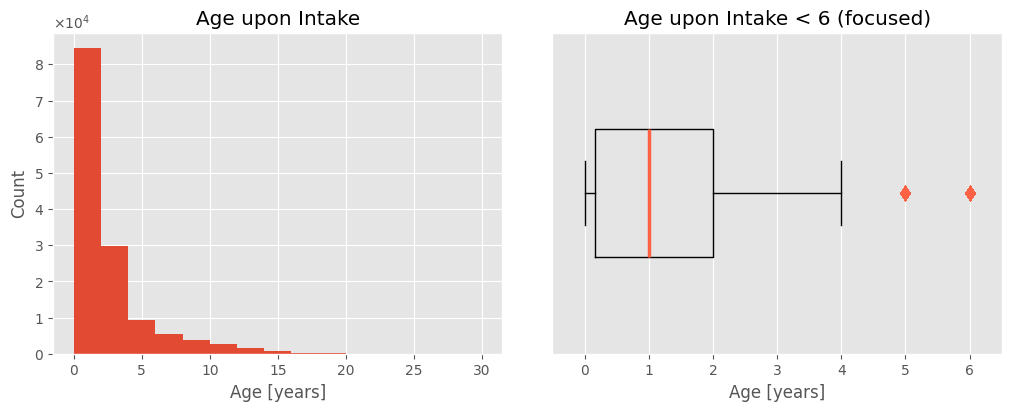

In [36]:
plot_univar_num('Age upon Intake', 'Age upon Intake < 6 (focused)', 'Age [years]', 'Count', ageY, xlim=(-0.5, 6.5), scinot=True)

In [37]:
intakes_df[ageY == 30]

Animal ID      Name            DateTime  \
132371   A842878  Sunshine 2021-10-30 10:07:00   

                         Found Location      Intake Type Intake Condition  \
132371  3008 West Avenue in Austin (TX)  Owner Surrender            Other   

       Animal Type  Age upon Intake  Breed      Color Sterile     Sex  
132371        Bird            10950  Macaw  Blue/Gold   False  Female

Nejstarší zvíře v útulku je 39 letý papoušek Ara (samička) jménem Sunshine 🙂🦜.

## 📅 Příznak Datetime (intakes)

Popište příznaky Age upon Intake a **DateTime (původně z datasetu intakes)** pomocí univariačních deskriptivních statistik.

In [38]:
def dt_to_counts(dts):
    dtc = pd.to_datetime(dts).dt.date.value_counts()

    # fill days with no intakes
    idx = pd.date_range(dtc.index.min(), dtc.index.max())
    dtc.index = pd.DatetimeIndex(dtc.index)
    dtc = dtc.reindex(idx, fill_value=0)
    return dtc

In [39]:
dt = intakes_df['DateTime']
dtcount = dt_to_counts(dt)

dt.info()

<class 'pandas.core.series.Series'>
Index: 138565 entries, 0 to 138584
Series name: DateTime
Non-Null Count   Dtype         
--------------   -----         
138565 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.1 MB


In [40]:
print_univar_dt_stats(dt)

DateTime statistics

min:	 2013-10-01 01:12:00
max:	 2022-04-27 07:54:00
mode:	 [Timestamp('2014-07-09 12:58:00'), Timestamp('2016-09-23 12:00:00')]
range:	 3130 days 06:42:00


In [41]:
print_univar_num_stats(dtcount)

count statistics

min:	 0
max:	 140
mean:	 44.25582880868732
median:	 44.0
range:	 140

lower quartile:	 34.0
upper quartile:	 55.0
IQR:		 21.0

variance:	 331.17574476812825
std. variation:	 18.198234660761145
skewness:	 0.26627105755009095
kurtosis:	 0.7186242354271446


In [42]:
dtcount[dtcount == dtcount.max()]

2014-07-09    140
Freq: D, Name: count, dtype: int64

Příznak DateTime z datasetu intakes je časový příznak.

* Ze základních statistik vidíme, že první digitálně zaznamenaný příchod zvířete byl 1. října 2013 a poslední 27. dubna 2022.
* Nejvyšší počet přijatých zvířat bylo dne 9. července 2014, kdy bylo do systému přidáno 140 nových zvířat.
* Průměrně se každých den přijme 44 zvířat, v 50% případů 34-55 zvířat.

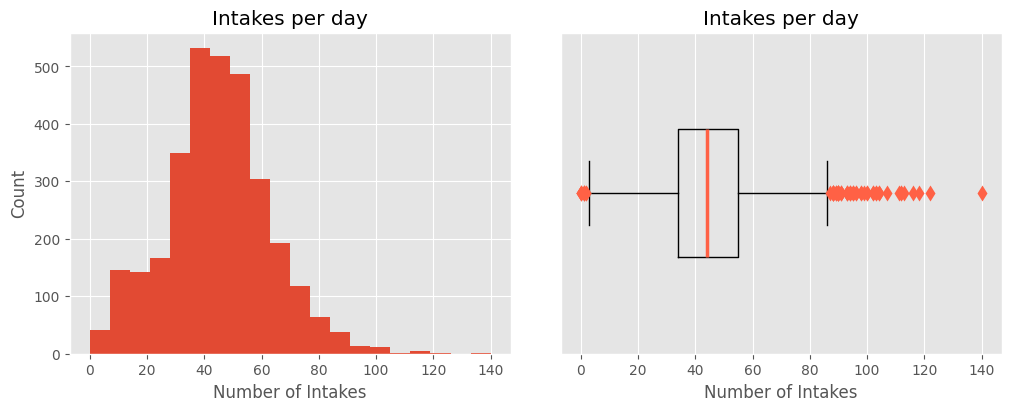

In [43]:
plot_univar_num('Intakes per day', 'Intakes per day', 'Number of Intakes', 'Count', dtcount, bins=20, showfliers=True)

## 🐾 Příznak Animal Type (intakes)

**1.** Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.

In [44]:
def plot_univar_cat(title1, title2, xlabel, icons, data, *, prop=1000):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', gridspec_kw={'wspace': 0.2})
    ax = axes[0]
    ax.set_title(title1)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
    ax.barh(data.index, data)
    ax.invert_yaxis()

    val = data / prop
    val_freq = val / val.sum()
    waff.Waffle.make_waffle(
        ax=axes[1],
        rows=12,
        values=val,
        title={'label': title2, 'loc': 'center'},
        labels=[f"{k} ({v*100:.2f}%)" for k, v in val_freq.items()],
        legend={'bbox_to_anchor': (1.7, 1), 'ncol': 1, 'framealpha': 0},
        icons=icons,
        font_size=16,
        # icon_style='solid',
        icon_legend=True,
        starting_location='NW',
        vertical=True,
        cmap_name="Set2"
    )

In [45]:
in_type = intakes_df['Animal Type']
in_type_c = in_type.value_counts()
in_type_cnorm = in_type.value_counts(normalize=True)

print('Intakes Animal Type')
display(in_type.info())

Intakes Animal Type
<class 'pandas.core.series.Series'>
Index: 138565 entries, 0 to 138584
Series name: Animal Type
Non-Null Count   Dtype   
--------------   -----   
138565 non-null  category
dtypes: category(1)
memory usage: 5.2 MB


None

In [46]:
in_type.describe()

count     138565
unique         5
top          Dog
freq       78135
Name: Animal Type, dtype: object

In [47]:
in_type_c

Animal Type
Dog          78135
Cat          52373
Other         7372
Bird           661
Livestock       24
Name: count, dtype: int64

Příznak Animal Type je kategorický příznak s 5 kategoriemi: Bird, Cat, Dog, Livestock, Other.

* Ze základních statistik vidíme, že nejčetnějším zvířetem v útulku jsou psi (56%).
* Po psech následují kočky (37%). Méně zastoupená zvířata jsou ptáci, dobytek a "ostatní".
* Psi a kočky dohroma tvoří přes 94% záznamů.

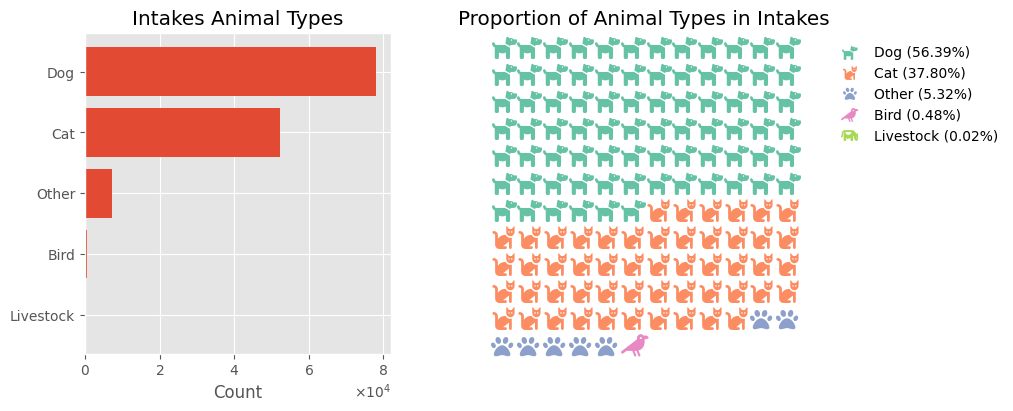

In [48]:
plot_univar_cat('Intakes Animal Types', 'Proportion of Animal Types in Intakes', 'Count', ['dog', 'cat', 'paw', 'crow', 'cow'], in_type_c)

## 🌈 Příznak Color (intakes)

**2.** Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.

In [49]:
intakes_df['Color'].str.split('/', n=-1).value_counts()

Color
[Black, White]          14469
[Black]                 11613
[Brown Tabby]            7948
[Brown]                  5935
[White]                  4866
                        ...  
[Black Tabby, Gray]         1
[Yellow, Red]               1
[Seal Point, Cream]         1
[White, Lilac Point]        1
[Brown Tabby, Tan]          1
Name: count, Length: 616, dtype: int64

In [50]:
len(intakes_df['Color'].unique())

616

In [51]:
cols = intakes_df['Color'].str.split('/', n=-1)
cols = pd.Series(np.concatenate(cols.to_numpy().flatten()))
cols = cols.value_counts()

In [52]:
cols.index, len(cols.index)

(Index(['White', 'Black', 'Brown', 'Tan', 'Brown Tabby', 'Blue', 'Orange Tabby',
        'Tricolor', 'Brown Brindle', 'Red', 'Gray', 'Blue Tabby', 'Tortie',
        'Calico', 'Chocolate', 'Torbie', 'Cream', 'Cream Tabby', 'Fawn',
        'Sable', 'Yellow', 'Buff', 'Lynx Point', 'Blue Merle', 'Gray Tabby',
        'Seal Point', 'Orange', 'Black Brindle', 'Flame Point', 'Black Tabby',
        'Blue Tick', 'Brown Merle', 'Gold', 'Silver', 'Black Smoke', 'Red Tick',
        'Lilac Point', 'Red Merle', 'Tortie Point', 'Silver Tabby',
        'Blue Cream', 'Yellow Brindle', 'Apricot', 'Green', 'Blue Point',
        'Chocolate Point', 'Liver', 'Calico Point', 'Pink', 'Blue Tiger',
        'Brown Tiger', 'Agouti', 'Silver Lynx Point', 'Blue Smoke',
        'Liver Tick', 'Black Tiger', 'Orange Tiger', 'Cream Tiger',
        'Gray Tiger', 'Ruddy'],
       dtype='object'),
 60)

In [53]:
cols.head()

White          61893
Black          43306
Brown          20784
Tan            15939
Brown Tabby    12772
Name: count, dtype: int64

Příznak Color je kategorický příznak.

* Ze základních statistik vidíme, že nejčastější barevné kombinace zvířat jsou černobílá ⬛⬜, černá ⬛ a hnědá 🟫.
* Počítáme-li všechny barvy na zvířeti, velká část má bílou ⬜, černou ⬛, hnědou 🟫 nebo bronzovou barvu.
* V datasetu mají zvířata celkem 616 unikátních barevných kombinací z 60 barev.

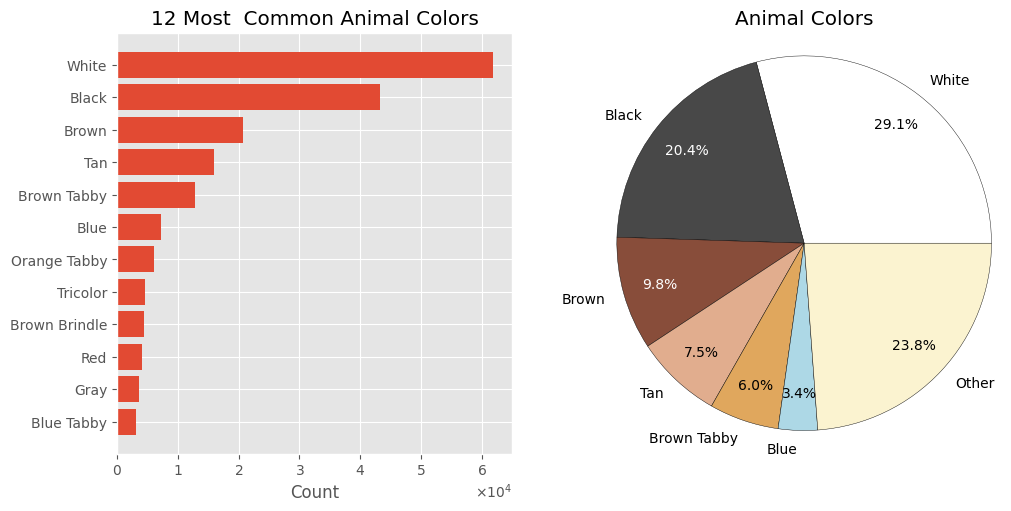

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained', gridspec_kw={'wspace': 0.1})
ax = axes[0]
toshow = cols.iloc[:12]
ax.set_title('12 Most  Common Animal Colors')
ax.set_xlabel('Count')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.barh(toshow.index, toshow)
ax.invert_yaxis()

ax = axes[1]
ax.set_title('Animal Colors')
t = 6
sumcol = cols.iloc[:t]
sumcol['Other'] = cols.iloc[t:].sum()
patches, _, autotexts = ax.pie(sumcol, labels=sumcol.index, autopct='%1.1f%%', pctdistance=0.8, frame=False,
       colors=['white', '#484848', '#884d3a', '#e1ad8e', '#e0a75d', '#add8e6', '#fbf3d0'],
       wedgeprops={"edgecolor":'black','linewidth': 0.3, 'antialiased': True})
ax.axis('equal')
autotexts[1].set_color('white')
autotexts[2].set_color('white')

## ⚕️ Příznak Intake Condition

**3.** Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.

In [55]:
cond = intakes_df['Intake Condition'].value_counts()
cond

Intake Condition
Normal        119305
Injured         7841
Sick            5997
Nursing         3932
Aged             463
Neonatal         321
Other            245
Medical          174
Feral            125
Pregnant         103
Behavior          49
Space              4
Med Attn           3
Med Urgent         2
Panleuk            1
Name: count, dtype: int64

Příznak Intake Condition je kategorický příznak.

* Ze statistik vidíme, že ve většině případů jsou zvířata přijata ve stavu Normal (86%).
* V ostatních případech jsou nejčastěji přijata zraněná (40%), nemocná (31%), nebo se zotavují (20%).

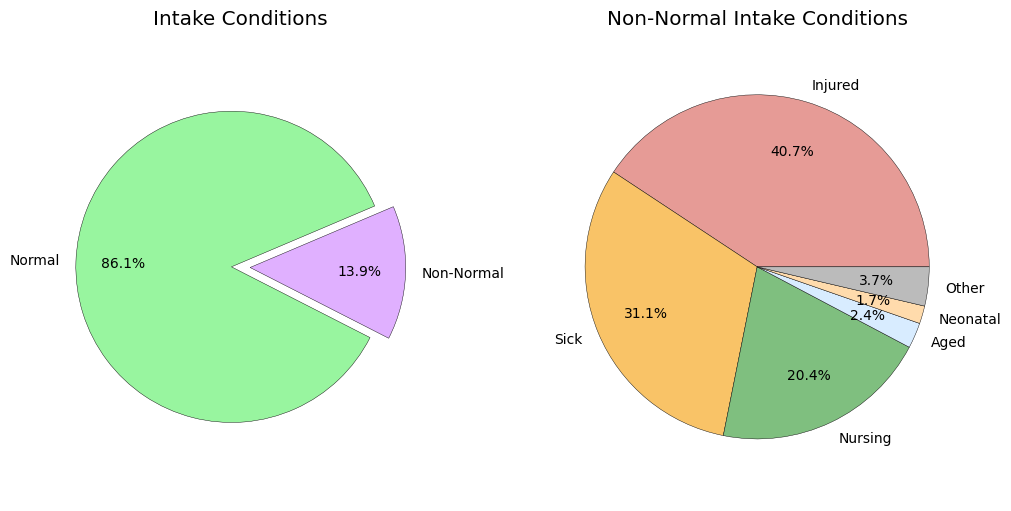

In [56]:
normal = cond.loc['Normal']
nonnormal = cond.loc[cond.index != 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(10, 5), layout='constrained', gridspec_kw={'wspace': 0.1})
# ax = axes[2]
# ax.set_title('Comparison of Non-Normal Intake Conditions')
# ax.set_xlabel('Count')
# ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
# ax.barh(nonnormal.index, nonnormal)
# ax.invert_yaxis()

ax = axes[0]
ax.set_title('Intake Conditions')
patches, _, autotexts = ax.pie([normal, nonnormal.sum()], labels=['Normal', 'Non-Normal'], autopct='%1.1f%%', pctdistance=0.7, frame=False,
       colors=['#98f59f', '#E0B0FF'], startangle=23, explode=(0, 0.12),
       wedgeprops={"edgecolor":'black','linewidth': 0.3, 'antialiased': True})
ax.axis('equal')

ax = axes[1]
ax.set_title('Non-Normal Intake Conditions')
t = 5
sumcol = nonnormal.iloc[:t]
sumcol['Other'] = nonnormal.iloc[t:].sum()
patches, _, autotexts = ax.pie(sumcol, labels=sumcol.index, autopct='%1.1f%%', pctdistance=0.7, frame=False,
       colors=['#e69b96', '#f9c367', '#7fbf7f', '#d8ecff', '#ffdbac', '#bbb'],
       wedgeprops={"edgecolor":'black','linewidth': 0.3, 'antialiased': True})
ax.axis('equal');

## 🏠 Původ zvířat

**1.** Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik.

In [57]:
sample = intakes_df[intakes_df['Animal Type'] == 'Other'].loc[:, 'Breed'].unique()
print(list(sample)[:20])

['Bat', 'Bat Mix', 'Hamster Mix', 'Raccoon', 'Raccoon Mix', 'Rabbit Sh Mix', 'Skunk Mix', 'Cinnamon', 'Rabbit Sh', 'Opossum', 'Skunk', 'Dutch/Angora-Satin', 'Fox', 'Rat', 'Guinea Pig Mix', 'Ferret', 'Cold Water', 'Rat Mix', 'Opossum Mix', 'Guinea Pig']


In [58]:
condtype = intakes_df.loc[:, ['Intake Type', 'Animal Type']].value_counts().unstack().fillna(0).astype(int).transpose()
cm = sns.light_palette(blue, as_cmap=True)
style = condtype.style.background_gradient(axis=1, cmap=cm).set_properties(**{'text-align':'center','font-size':'16px'})
style.map(lambda v: 'opacity: 30%;' if (v == 0) else None)
style.set_caption('Animal Types by Intake Type').set_table_styles([dict(
    selector='caption', props=[('font-size', '150%'), ('text-align', 'left'), ('color', '#555')])])

Zvířata se do útulku většinou dostanou tím, že:

* (u ptáků, koček a psů) jsou nalezena zatoulaná nebo se jich původní majitelé vzdali
* u divokých a exotických zvířat (ostatní - netopýři, jeleni, hadi, žáby, ...) - jsou z volné přírody
* menší čast zvířat byla původními majiteli opuštěna nebo byla přijata s požadavkem o eutanazii

Vizualizace (tabulka) podkládá zmíněné poznatky. Hodnoty v tabulkách jsou četnosti výskytu daných případů. Barva na pozadí zvýrazňuje nejvíce zastoupené hodnoty na řádce.

## 🚪 Odchody zvířat

**2.** Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik.

In [59]:
types = outcomes_df.loc[:, ['Outcome Subtype', 'Animal Type']].value_counts().unstack().fillna(0).astype(int).transpose()
cm = sns.light_palette(blue, as_cmap=True)
style = types.style.background_gradient(axis=1, cmap=cm).set_properties(**{'text-align':'center','font-size':'16px'})
style.map(lambda v: 'opacity: 30%;' if (v == 0) else None)
style.set_caption('Animal Types by Outcome Type').set_table_styles([dict(
    selector='caption', props=[('font-size', '150%'), ('text-align', 'left'), ('color', '#555')])])

Zvířata odcházejí

* nejčastěji: s novým majitelem nebo jdou do pěstounské péče
* některým zvířatům způsobuje přežívání bolest a podstupují eutanazii
* u divokých a exotických zvířat (netopýři, jeleni, hadi, žáby, ...) - je častým důvodem odchodu riziko vztekliny
* potulné kočky jsou v útulcích často neutralizované metodamy SNR (shelter-neuter-return) nebo jim je nalezen domov v SCRP (Stray Cat Return Program)

# ❓ Otázky

## 💙 Závislost typu odchodu na typu příchodu

Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.

Sestrojíme si nový dataset merged, ve kterém jsou zvířata, která se v obou datasetech vyskytují právě jednou.

In [60]:
sonce = intakes_df['Animal ID'].value_counts() == 1
in_wo_dupl = intakes_df.loc[intakes_df['Animal ID'].isin(sonce[sonce].index.values)]
sonce = outcomes_df['Animal ID'].value_counts() == 1
out_wo_dupl = outcomes_df.loc[outcomes_df['Animal ID'].isin(sonce[sonce].index.values)]
merged = intakes_df.merge(outcomes_df, on='Animal ID', suffixes=('_in', '_out'))
durs = merged['DateTime_out'] - merged['DateTime_in']
merged = merged[durs == abs(durs)]

In [61]:
counts = merged.loc[:, ['Intake Type', 'Outcome Type']].value_counts().unstack().fillna(0).astype(int)
cm = sns.light_palette(blue, as_cmap=True)
style = counts.style.background_gradient(axis=1, cmap=cm).set_properties(**{'text-align':'center','font-size':'16px'})
style.map(lambda v: 'opacity: 30%;' if (v == 0) else None)
style.set_caption('Outcome Types by Intake Type').set_table_styles([dict(
    selector='caption', props=[('font-size', '150%'), ('text-align', 'left'), ('color', '#555')])])

Typ příchodu má zřejmě značný vliv na typ odchodu.

Vidíme, že
* zvířata, která skončila opuštěná, majitelé se jich vzdali nebo byla před přijetím do útulku toulavá, byla adoptovaná
* zvířata s typem příchodu Public Assist jsou často vrácena původním majitelům nebo v pětině případů adoptovaná
* zvířata z volné přírody + zvířata, která byla přijata s požadavkem o euthanázii, zákrok často podstoupí

## 🐥 Věk zvířete při adopci

Hraje věk zvířete roli při adopci?

Rozdělíme si odchody na typ Adoptovaná a Neadoptovaná.

In [62]:
adopted = outcomes_df.loc[outcomes_df['Outcome Type'] == 'Adoption', 'Age upon Outcome']/365
notadopted = outcomes_df.loc[outcomes_df['Outcome Type'] != 'Adoption', 'Age upon Outcome'].dropna()/365

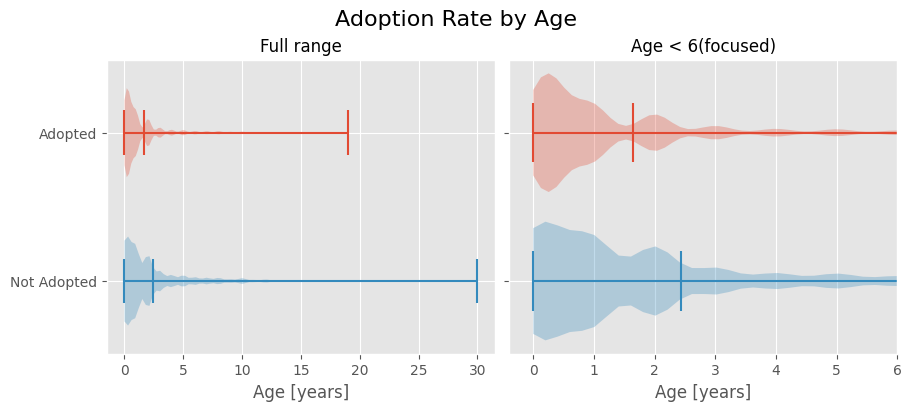

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True, layout='constrained')
fig.suptitle('Adoption Rate by Age', fontsize=16)
ax1.xaxis.grid(True)
ax1.set_title('Full range', fontsize=12)
ax1.set_xlabel('Age [years]')
ax1.set_yticks([1, 2], labels=['Adopted', 'Not Adopted'])
parts = ax1.violinplot([adopted.astype(float), notadopted.astype(float)], [1, 2],
               widths=0.6, points=100, vert=False, showmeans=True)
parts['bodies'][0].set_facecolor(red)
parts['bodies'][1].set_facecolor(blue)
for part in ['cbars', 'cmaxes', 'cmins', 'cmeans']:
    parts[part].set_color([red, blue])
ax1.invert_yaxis()

ax2.xaxis.grid(True)
ax2.set_title('Age < 6(focused)', fontsize=12)
ax2.set_xlabel('Age [years]')
parts = ax2.violinplot([adopted.astype(float), notadopted.astype(float)], [1, 2],
               widths=0.8, points=150, vert=False, showmeans=True)
parts['bodies'][0].set_facecolor(red)
parts['bodies'][1].set_facecolor(blue)
for part in ['cbars', 'cmaxes', 'cmins', 'cmeans']:
    parts[part].set_color([red, blue])
ax2.set_xlim(left=-.4, right=6);

Z této vizualizace je možné si všimnout, že neadoptovaná zvířata mají relativně velké zastoupení i ve vyššíšch věkových kategorií, zatímco věk adoptovaných zvířat se drží u nižších hodnot.

Neadoptovaných zvířat je v datasetu víc, rozdíl je znatelný po normalizaci. Lze usoudit, že adopce je častější u mladších jedinců.

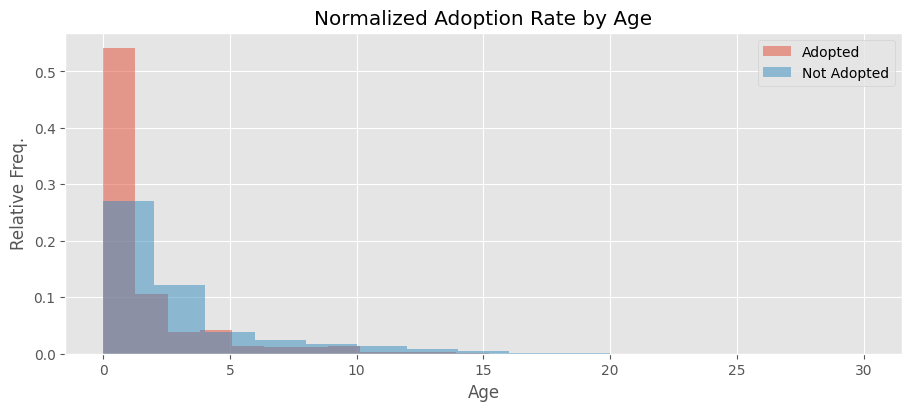

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), layout='constrained')
ax.set_title('Normalized Adoption Rate by Age')
ax.hist(adopted, 15, alpha=0.5, color=(226/255, 74/255, 51/255), label='Adopted', density=True)
ax.hist(notadopted, 15, alpha=0.5, label='Not Adopted', color=(52/255, 138/255, 189/255), density=True)
ax.set_xlabel('Age')
ax.set_ylabel('Relative Freq.')
ax.legend();

## 📈 Příjem zvířat

Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

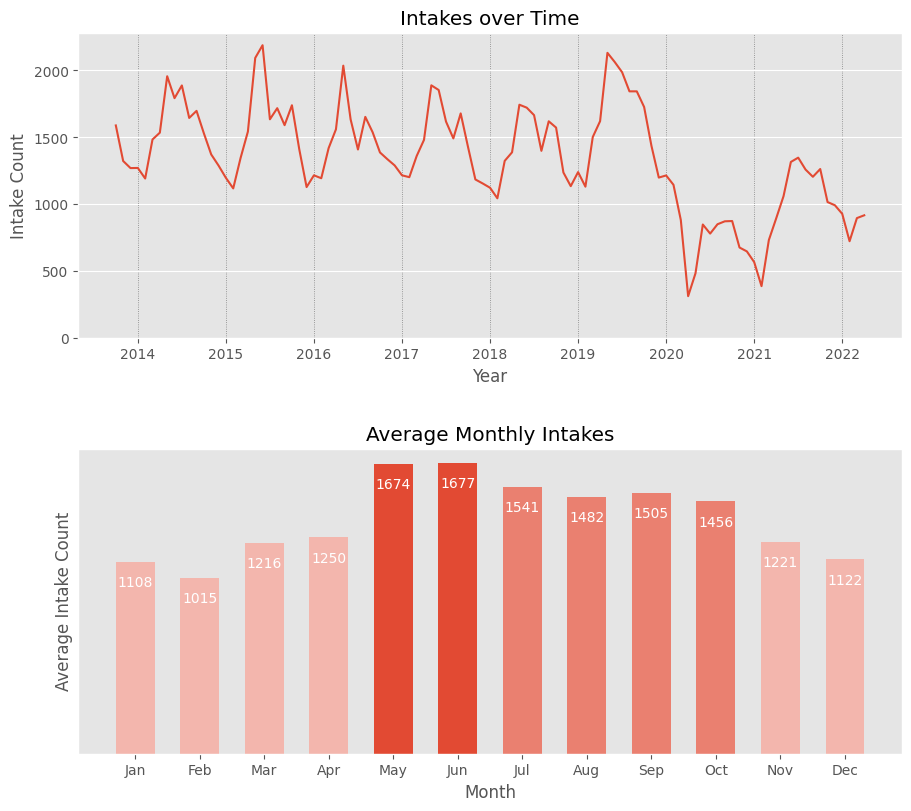

In [65]:
time_ser = intakes_df['DateTime'].dt.strftime('%Y-%m').value_counts().sort_index()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8), layout='constrained', gridspec_kw={'hspace': 0.1})
ax1.plot(time_ser)
ticks = list(time_ser.index)[3::12]
ticklabels = list(time_ser.index)[3+5::12]
ax1.set_xticks(ticks)
ax1.set_xticklabels(f"{tick[:-3]}" for tick in ticks)
ax1.set_title('Intakes over Time')
ax1.set_ylim(ymin=0)
ax1.set_xlabel('Year')
ax1.set_ylabel('Intake Count')
ax1.grid(which='major', axis='x', color='grey', linestyle='dotted', linewidth=0.6)

dt = intakes_df[['DateTime']].copy()
dt['Year'] = dt['DateTime'].dt.year
dt['Month'] = dt['DateTime'].dt.month
dt = dt.drop('DateTime', axis=1)
dt = dt.value_counts().groupby(['Year', 'Month']).sum()
means = dt.groupby('Month').mean()
bar_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
(main, second, rest) = (red, '#ea8070', '#f3b6ad')
bar_colors = [rest, rest, rest, rest, main, main, second, second, second, second, rest, rest]
p = ax2.bar(means.index, means, width=0.6, color=bar_colors)
ax2.set_title('Average Monthly Intakes')
ax2.set_xticks(range(1, 13), labels=bar_labels)
ax2.set_xlabel('Month')
ax2.bar_label(p, fmt='%i', padding=-20, color='w')
ax2.set_yticks([])
ax2.set_ylim(ymin=0)
ax2.set_ylabel('Average Intake Count')
ax2.grid(visible=False, which='major', axis='both')

Na vývoji počtu přijatých zvířat je vidět, že jsou jistá obodbí v roce, kdy je příjem výrazně vyšší.
Z druhého grafu vyčteme, že toto období trvá od května do října, kdy je průměrný přijem zvířat o zhruba 500 víc než v ostatních měsících.
Nejmenší příjem je v zímně a na jaře.

Pozn.: 😷🦠 Z přvního grafu o vývoji lze vypozorovat náhlý pokles příjmů na konci roku 2019 z důvodu koronavirové krize. Od té doby frekvence příchodů pomalu roste.

## 💔 Kastrace zvířat

Jak se mění stav plodnosti zvířat? -- stav při příchodu v. stav při odchodu

In [66]:
counts = merged.loc[:, ['Sterile_in', 'Sterile_out']].value_counts()
scounts = counts.reset_index().reindex([2, 0, 1]).reset_index(drop=True)
cnt_nst_in = scounts.loc[scounts['Sterile_in'] == False, 'count'].sum()
cnt_st_in = scounts.loc[scounts['Sterile_in'] == True, 'count'].sum()
scounts.loc[:2, 'frac'] = scounts.loc[:2, 'count']/cnt_nst_in
scounts.loc[2:, 'frac'] = scounts.loc[2:, 'count']/cnt_st_in
scounts['frac'] = scounts['frac']

cm = sns.light_palette(blue, as_cmap=True)
style = scounts.style.set_properties(**{'text-align':'center','font-size':'16px'})
style.set_caption('Animal Types by Origin').set_table_styles([dict(
    selector='caption', props=[('font-size', '150%'), ('text-align', 'right'), ('color', '#555')])])
style.format(precision=2)

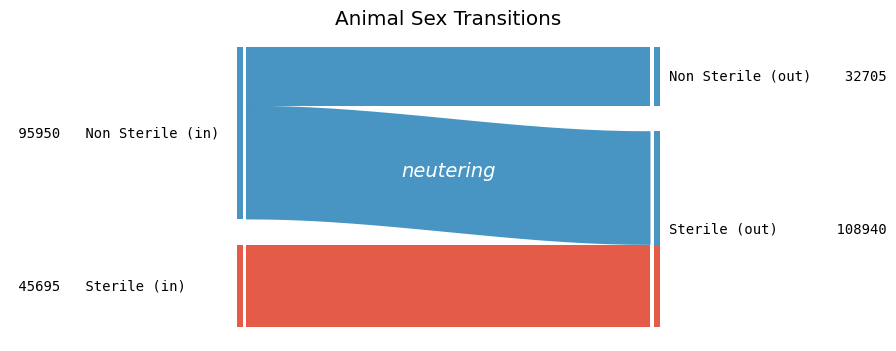

In [67]:
counts = merged.loc[:, ['Sterile_in', 'Sterile_out']].value_counts()
st_in, nst_in, st_out, nst_out = ('Sterile (in)', 'Non Sterile (in)', 'Sterile (out)', 'Non Sterile (out)')
cdict = {st_in: {st_out: counts.loc[True, True]},
         nst_in: {st_out: counts.loc[False, True], nst_out: counts.loc[False, False]}}
ax = alluvial.plot(cdict, figsize=(6, 4), fontname='Monospace', color_side=0,
                   alpha=0.9, colors=[red, blue], src_label_override=[st_in, nst_in], dst_label_override=[st_out, nst_out],
                   disp_width=True, wdisp_sep=3*' ', width_in=False, v_gap_frac=0.1)
ax.set_title('Animal Sex Transitions')

left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax.text(0.5, 0.55, 'neutering', fontstyle='oblique',
        horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes, color='w', fontsize=14);

Pro jednoduchost opět uvažujeme pouze zvířata, která navštívila a opustila útulek právě jednou.

Z vizualizace je patrné, že velká čast (66%) příchozích plodných zvířat podstoupí v útulku kastraci.

😃😃: Žádnému zvířeti se nepodařilo zvrátit operaci. Doktor Preobraženskij přestal experimentovat (Mikhail Bulgakov, Psí srdce 🐺).

## ⏳ Čas strávený v útulku

Kolik času stráví zvířata v útulku? 

In [68]:
durs = (merged['DateTime_out'] - merged['DateTime_in']).dt.days
print_univar_num_stats(durs)

None statistics

min:	 0
max:	 2948
mean:	 63.78191485852635
median:	 7.0
range:	 2948

lower quartile:	 3.0
upper quartile:	 34.0
IQR:		 31.0

variance:	 40540.078983925494
std. variation:	 201.345670387832
skewness:	 6.139468243278622
kurtosis:	 46.946690264259104


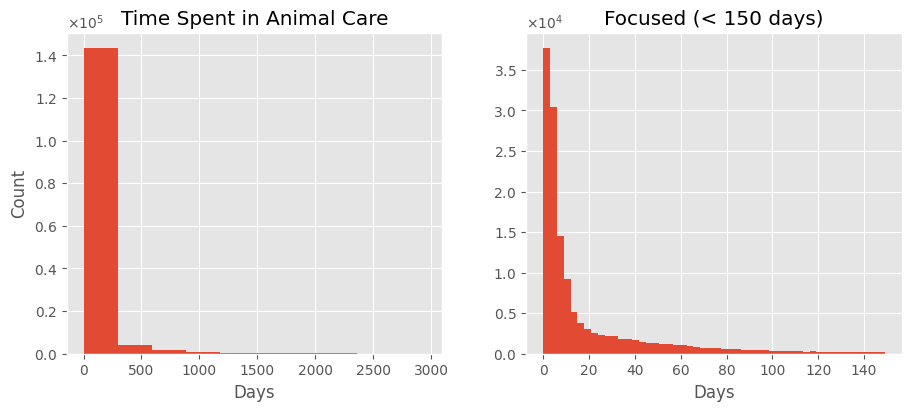

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=False, layout='constrained', gridspec_kw={'wspace': 0.1})
ax1.hist(durs)
ax1.set_title('Time Spent in Animal Care')
ax1.set_xlabel('Days')
ax1.set_ylabel('Count')
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

ax2.hist(durs[durs < 150], bins=50)
ax2.set_title('Focused (< 150 days)')
ax2.set_xlabel('Days')
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

In [70]:
durs.sort_values(ascending=False).head(5) / 360

176625    8.188889
90634     8.163889
31455     8.077778
171654    8.072222
177941    8.052778
dtype: float64

Pro úplnost uvažujeme pouze zvířata, která už odešla. Obvykle nejsou zvířata v útulku déle než 3 měsíce, často odchází ještě dřív (do 1 měsíce). Najdeme i případy, kdy byla zvířata v pěči až 8 let. Průměrně však stráví v útulku 63 dní, přičemž medián je pouhých 7 dní.

Pozn.: V pravém histogramu má osa y jiné měřítko.

## 💉 Euthanazie

Je frekvence eutanazií konstantní, nebo je období, kdy jsou eutanazie častější?

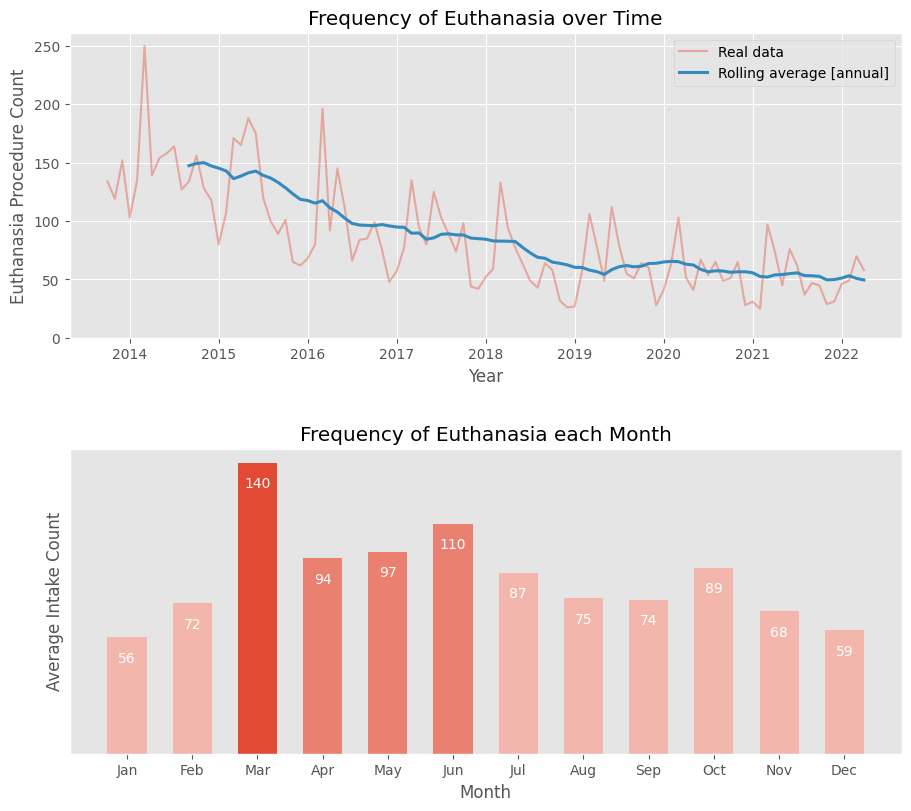

In [71]:
counts = merged.loc[merged['Outcome Type'] == 'Euthanasia', 'DateTime_out']
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 8), sharey=False, layout='constrained', gridspec_kw={'hspace': 0.1})
ax1.set_title('Frequency of Euthanasia over Time')
time_ser = counts.dt.strftime('%Y-%m').value_counts().sort_index()
ax1.plot(time_ser, label='Real data', alpha=0.4)
ax1.plot(time_ser.rolling(window=12).mean(), label='Rolling average [annual]', linewidth=2.2)
ticks = list(time_ser.index)[3::12]
ticklabels = list(time_ser.index)[3+5::12]
ax1.set_xticks(ticks)
ax1.set_xticklabels(f"{tick[:-3]}" for tick in ticks)
ax1.set_ylim(ymin=0)
ax1.set_xlabel('Year')
ax1.set_ylabel('Euthanasia Procedure Count')
ax1.legend()

dt = merged.loc[merged['Outcome Type'] == 'Euthanasia', ['DateTime_out']].copy()
dt['Year'] = dt['DateTime_out'].dt.year
dt['Month'] = dt['DateTime_out'].dt.month
dt = dt.drop('DateTime_out', axis=1)
dt = dt.value_counts().groupby(['Year', 'Month']).sum()
means = dt.groupby('Month').mean()
bar_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
(main, second, rest) = (red, '#ea8070', '#f3b6ad')
bar_colors = [rest, rest, main, second, second, second, rest, rest, rest, rest, rest, rest]
p = ax2.bar(means.index, means, width=0.6, color=bar_colors)
ax2.set_title('Frequency of Euthanasia each Month')
ax2.set_xticks(range(1, 13), labels=bar_labels)
ax2.set_xlabel('Month')
ax2.bar_label(p, fmt='%i', padding=-20, color='w')
ax2.set_yticks([])
ax2.set_ylim(ymin=0)
ax2.set_ylabel('Average Intake Count')
ax2.grid(visible=False, which='major', axis='both')

Z prvního grafu s klouzavým průměrem je možné vyčíst, že počet zákroků od roku 2013 klesá. Průměr 150 zákroků měsíčně kleslo na 50 zákroků.

Celkové mesíční průměry jsou ale stále vlivem starších hodnot vysoké. Nejvýšší frekvence zákroků je v březnu (jarní úklid? 🌱🧹), kdy průměrně 140 zvířat podstupuje eutanazií. Průměr je zhruba okolo 100 další 3 měsíce. Ve zbytku roku se pohybuje počet zákroků pod 90 měsíčně.

# Konec